# level-1, Task-1

# import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data

In [31]:

df = pd.read_csv(r"C:\Users\SASWATAM\Downloads\Dataset .csv")

In [37]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [41]:
df.shape

(9551, 21)

# Analyze the 'Cuisines' Column** To find the top three most common cuisines, we need to handle multiple cuisines listed for each restaurant**
.**# Split the 'Cuisines' column to handle multiple cuisines per restaura**nt

In [125]:
cuisine_series = df['Cuisines'].str.split(', ').explode()
cuisine_series

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
             ...       
9547               Cafe
9548            Italian
9548      World Cuisine
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 19719, dtype: object

In [127]:
cuisine_counts = cuisine_series.value_counts()
cuisine_counts

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64

In [129]:
top_three_cuisines = cuisine_counts.head(3)
print(top_three_cuisines)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [131]:
len(df)

9551

# Calculate the Percentage of Restaurants Serving Each Cuisine
**To calculate the percentage, we need the total number of restaurants.**

In [136]:
total_restaurants = len(df)
top_three_percentages = (top_three_cuisines / total_restaurants) * 100
print(top_three_percentages)

Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


# level-1, task-2

# Identify the city with the highest number of restaurants

In [139]:
city_counts = df['City'].value_counts()
city_counts

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [141]:
city_with_most_restaurants = city_counts.idxmax()
num_restaurants = city_counts.max()
print(f"The city with the highest number of restaurants is {city_with_most_restaurants} with {num_restaurants} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


In [143]:
# Calculate the average rating for restaurants in each city
average_ratings = df.groupby('City')['Aggregate rating'].mean()
print("Average ratings for each city:")
print(average_ratings)

Average ratings for each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [145]:
# Determine the city with the highest average rating
city_with_highest_avg_rating = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()
print(f"The city with the highest average rating is {city_with_highest_avg_rating} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


# level-1, task-3

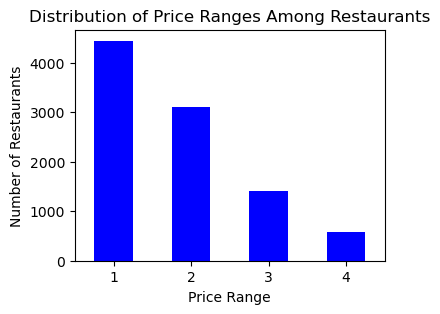

In [168]:
# Plot the distribution of price ranges
plt.figure(figsize=(4, 3))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

In [149]:
# Calculate the percentage of restaurants in each price range category
price_range_counts = df['Price range'].value_counts()
price_range_counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [151]:
total_restaurants = len(df)
total_restaurants

9551

In [153]:
price_range_percentages = (price_range_counts / total_restaurants) * 100
print(price_range_percentages)

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


# level-1, task-4

In [155]:
online_delivery_counts = df['Has Online delivery'].value_counts()
online_delivery_counts

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [157]:
    total_restaurants = len(df)
total_restaurants

9551

In [159]:
online_delivery_percentage = (online_delivery_counts['Yes'] / total_restaurants) * 100
print(f"The percentage of restaurants that offer online delivery is {online_delivery_percentage:.2f}%.")

The percentage of restaurants that offer online delivery is 25.66%.


# Compare the average ratings of restaurants with and without online delivery

In [162]:
average_rating_online_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_online_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f"The average rating of restaurants that offer online delivery is {average_rating_online_delivery:.2f}.")
print(f"The average rating of restaurants that do not offer online delivery is {average_rating_no_online_delivery:.2f}.")

The average rating of restaurants that offer online delivery is 3.25.
The average rating of restaurants that do not offer online delivery is 2.47.
